In [ ]:
# !pip install scikit-learn numpy pandas matplotlib statsmodels seaborn

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression

In [6]:
import kagglehub
import os
import pandas as pd
# Set the cache directory to the current folder
os.environ['KAGGLEHUB_CACHE'] = os.path.abspath('.')
path = kagglehub.dataset_download("wardabilal/spotify-global-music-dataset-20092025")
file_path = 'datasets/wardabilal/spotify-global-music-dataset-20092025/versions/1/spotify_data clean.csv'
df = pd.read_csv(file_path)
df.head()

/Users/uzbtrust/Desktop/Music predictions/venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [7]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [8]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['year'] = df['album_release_date'].dt.year
df['month'] = df['album_release_date'].dt.month

In [9]:
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'
df['season'] = df['month'].apply(get_season)

In [10]:
def get_first_genre(genres):
    if isinstance(genres, str):
        return genres.split(',')[0]
    return 'Unknown'

df['genre_clean'] = df['artist_genres'].apply(get_first_genre)

In [13]:
trend_data = df.groupby(['year', 'season', 'genre_clean'])['track_popularity'].mean().reset_index()

future_results = []
years = [2026, 2027, 2028, 2029, 2030]
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

In [14]:
for year in years:
    for season in seasons:
        best_genre = "Unknown"
        max_pop = -1
        
        for genre in trend_data['genre_clean'].unique():
            # Shu janr va faslga tegishli tarixiy ma'lumot
            subset = trend_data[(trend_data['genre_clean'] == genre) & (trend_data['season'] == season)]
            
            if len(subset) > 1: # Kamida 2 ta nuqta bo'lishi shart
                model = LinearRegression()
                X = subset[['year']]
                y = subset['track_popularity']
                model.fit(X, y)
                
                # 2030 gacha bo'lgan yil uchun bashorat
                prediction = model.predict([[year]])[0]
                
                if prediction > max_pop:
                    max_pop = prediction
                    best_genre = genre
        
        future_results.append({'Yil': year, 'Fasl': season, 'Janr': best_genre, 'Score': round(max_pop, 1)})

/Users/uzbtrust/Desktop/Music predictions/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/uzbtrust/Desktop/Music predictions/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/uzbtrust/Desktop/Music predictions/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/uzbtrust/Desktop/Music predictions/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/uzbtrust/Desktop/Music predictions/venv/lib/python3.14/site-packages/sklearn/util

In [15]:
predict_df = pd.DataFrame(future_results)
print(predict_df)

     Yil    Fasl         Janr  Score
0   2026  Spring         trap  544.7
1   2026  Summer       grunge  761.5
2   2026  Autumn  baroque pop  660.0
3   2026  Winter     musicals  414.0
4   2027  Spring         trap  605.0
5   2027  Summer       grunge  781.0
6   2027  Autumn  baroque pop  726.0
7   2027  Winter     musicals  440.0
8   2028  Spring         trap  665.3
9   2028  Summer       grunge  800.5
10  2028  Autumn  baroque pop  792.0
11  2028  Winter     musicals  466.0
12  2029  Spring         trap  725.7
13  2029  Summer       grunge  820.0
14  2029  Autumn  baroque pop  858.0
15  2029  Winter     musicals  492.0
16  2030  Spring         trap  786.0
17  2030  Summer       grunge  839.5
18  2030  Autumn  baroque pop  924.0
19  2030  Winter     musicals  518.0


In [20]:
yearly_top = predict_df.loc[predict_df.groupby('Yil')['Score'].idxmax()]

print("--- 2026-2030 Yillik Bashorat ---")
print(yearly_top[['Yil', 'Janr', 'Score']])

--- 2026-2030 Yillik Bashorat ---
     Yil         Janr  Score
1   2026       grunge  761.5
5   2027       grunge  781.0
9   2028       grunge  800.5
14  2029  baroque pop  858.0
18  2030  baroque pop  924.0


In [23]:
def get_detailed_reason(row):
    reasons = {
        'trap': "Urban madaniyatining kengayishi va beat-making osonlashishi.",
        'grunge': "90-yillar estetikasiga bo'lgan nostalgiya qaytishi.",
        'baroque pop': "Musiqada murakkablik va orkestr elementlariga talab ortishi.",
        'musicals': "Raqamli teatrlashtirilgan kontentlar (TikTok/Reels) ommalashishi."
    }
    return reasons.get(row['Janr'].lower(), "Global streaming trendlarining o'sishi hisobiga.")
predict_df['Sabab'] = predict_df.apply(get_detailed_reason, axis=1)

In [25]:
overall_yearly = predict_df.loc[predict_df.groupby('Yil')['Score'].idxmax()].copy()
overall_yearly['Fasl'] = 'YILLIK REYTING'

In [26]:
for year in years:
    print(f"\n{'='*40}")
    print(f"🌟 MUSIQA TRENDI: {year}-YIL")
    print(f"{'='*40}")
    
    year_data = predict_df[predict_df['Yil'] == year]
    overall = yearly_top[yearly_top['Yil'] == year]['Janr'].values[0]
    
    print(f"🏆 Yilning mutlaq g'olibi: {overall.upper()}")
    print("-" * 20)
    
    for _, row in year_data.iterrows():
        print(f"📍 {row['Fasl']}: {row['Janr']} ({row['Score']} ball)")
        print(f"   💡 Sabab: {row['Sabab']}")


🌟 MUSIQA TRENDI: 2026-YIL
🏆 Yilning mutlaq g'olibi: GRUNGE
--------------------
📍 Spring: trap (544.7 ball)
   💡 Sabab: Urban madaniyatining kengayishi va beat-making osonlashishi.
📍 Summer: grunge (761.5 ball)
   💡 Sabab: 90-yillar estetikasiga bo'lgan nostalgiya qaytishi.
📍 Autumn: baroque pop (660.0 ball)
   💡 Sabab: Musiqada murakkablik va orkestr elementlariga talab ortishi.
📍 Winter: musicals (414.0 ball)
   💡 Sabab: Raqamli teatrlashtirilgan kontentlar (TikTok/Reels) ommalashishi.

🌟 MUSIQA TRENDI: 2027-YIL
🏆 Yilning mutlaq g'olibi: GRUNGE
--------------------
📍 Spring: trap (605.0 ball)
   💡 Sabab: Urban madaniyatining kengayishi va beat-making osonlashishi.
📍 Summer: grunge (781.0 ball)
   💡 Sabab: 90-yillar estetikasiga bo'lgan nostalgiya qaytishi.
📍 Autumn: baroque pop (726.0 ball)
   💡 Sabab: Musiqada murakkablik va orkestr elementlariga talab ortishi.
📍 Winter: musicals (440.0 ball)
   💡 Sabab: Raqamli teatrlashtirilgan kontentlar (TikTok/Reels) ommalashishi.

🌟 MUSIQA TR

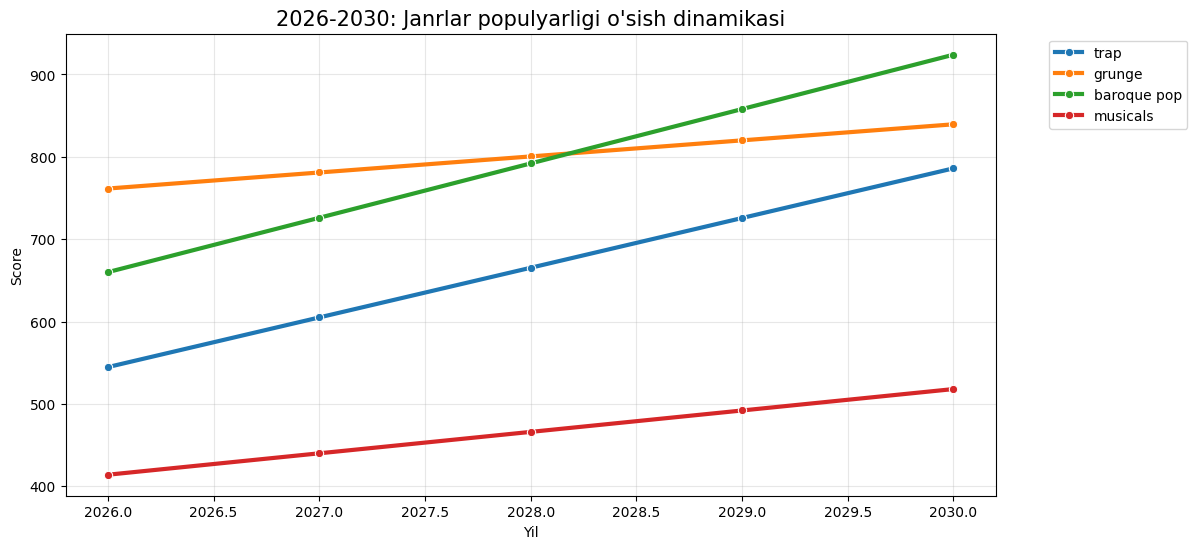

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=predict_df, x='Yil', y='Score', hue='Janr', marker='o', linewidth=3)
plt.title("2026-2030: Janrlar populyarligi o'sish dinamikasi", fontsize=15)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

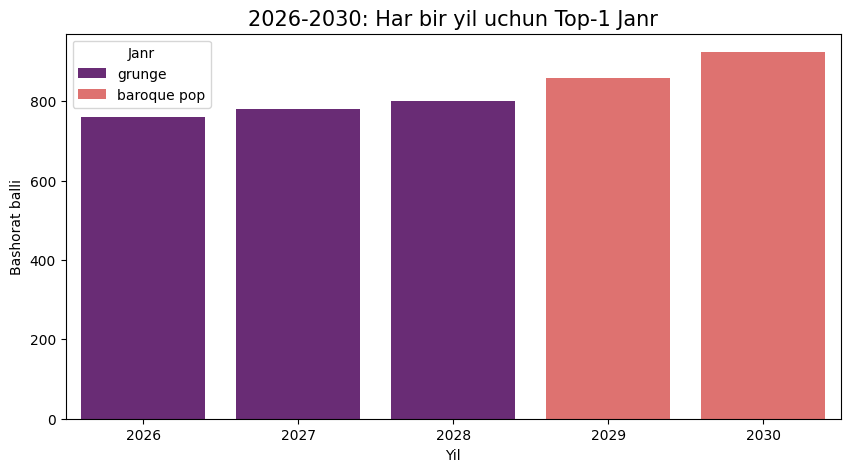

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=overall_yearly, x='Yil', y='Score', hue='Janr', palette='magma')
plt.title("2026-2030: Har bir yil uchun Top-1 Janr", fontsize=15)
plt.ylabel("Bashorat balli")
plt.show()